Za każdym razem możemy pobrać najnowszą wersję danych - są one aktualizowane codziennie na kaggle

In [2]:
import kagglehub
import shutil
import os

# Ściągnij dane
path = kagglehub.dataset_download("dissfya/wta-tennis-2007-2023-daily-update")

# Folder docelowy
target_dir = "../data/"
os.makedirs(target_dir, exist_ok=True)

# Skopiuj wszystkie pliki z folderu KaggleHuba do data/
for filename in os.listdir(path):
    src_file = os.path.join(path, filename)
    dst_file = os.path.join(target_dir, filename)
    shutil.copy2(src_file, dst_file)

print(f"Dane zostały zapisane do folderu: {target_dir}")


c:\Users\lukas\Desktop\studnia\eksploracja danych\eksploracja_projekt\data-minig-project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dane zostały zapisane do folderu: ../data/


# Analiza eksploracyjna danych

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/wta.csv")

C:\Users\lukas\AppData\Local\Temp\ipykernel_22808\4240325047.py:5: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/wta.csv")


In [4]:
df.head() # Pierwsze 5 wierszy

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Sun T.T.,Baker L.,Sun T.T.,81,272,332,90,1.33,3.00,6-1 6-1
1,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Myskina A.,Dulko G.,Dulko G.,16,59,1000,401,1.22,3.75,1-6 7-6 2-6
2,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Loit E.,Birnerova E.,Loit E.,56,84,418,324,1.72,2.00,6-1 6-1
3,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Nakamura A.,Craybas J.,Craybas J.,57,70,405,365,1.83,1.83,5-7 2-6
4,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Bartoli M.,Morita A.,Bartoli M.,18,180,951,152,1.16,4.50,7-6 6-3


In [5]:
df.info() # typy danych, liczba nullow

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42044 entries, 0 to 42043
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  42044 non-null  object 
 1   Date        42044 non-null  object 
 2   Court       42044 non-null  object 
 3   Surface     42044 non-null  object 
 4   Round       42044 non-null  object 
 5   Best of     42044 non-null  int64  
 6   Player_1    42044 non-null  object 
 7   Player_2    42044 non-null  object 
 8   Winner      42044 non-null  object 
 9   Rank_1      42044 non-null  int64  
 10  Rank_2      42044 non-null  int64  
 11  Pts_1       42044 non-null  int64  
 12  Pts_2       42044 non-null  int64  
 13  Odd_1       42044 non-null  object 
 14  Odd_2       42044 non-null  float64
 15  Score       42044 non-null  object 
dtypes: float64(1), int64(5), object(10)
memory usage: 5.1+ MB


In [6]:
df.describe() # podstawowe statystyki liczbowe

,Best of,Rank_1,Rank_2,Pts_1,Pts_2,Odd_2
count,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000,42044.000000
mean,3.000048,76.259942,75.120802,1559.633122,1577.268481,2.512031
std,0.009754,93.744359,92.399625,1599.984974,1621.368311,2.083469
min,3.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,3.000000,24.000000,24.000000,627.000000,630.000000,1.400000
50%,3.000000,54.000000,53.000000,1024.000000,1030.000000,1.830000
75%,3.000000,96.000000,95.000000,1831.000000,1845.250000,2.750000
max,5.000000,1876.000000,1825.000000,13615.000000,13615.000000,51.000000


In [7]:
df.isna().sum() # brak brakujących wartości

Tournament    0
Date          0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64

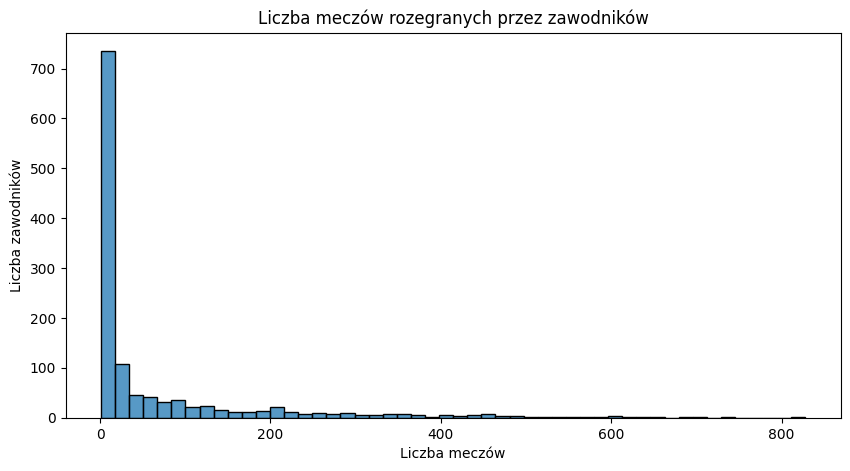

In [8]:
player_counts = pd.concat([df['Player_1'], df['Player_2']]).value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(player_counts, bins=50, kde=False)
plt.title("Liczba meczów rozegranych przez zawodników")
plt.xlabel("Liczba meczów")
plt.ylabel("Liczba zawodników")
plt.show()

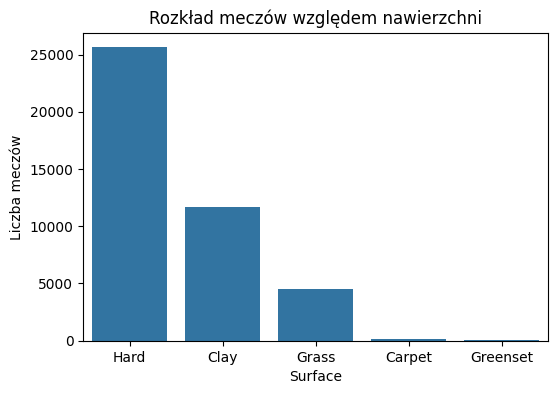

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Surface', order=df['Surface'].value_counts().index)
plt.title("Rozkład meczów względem nawierzchni")
plt.ylabel("Liczba meczów")
plt.show()

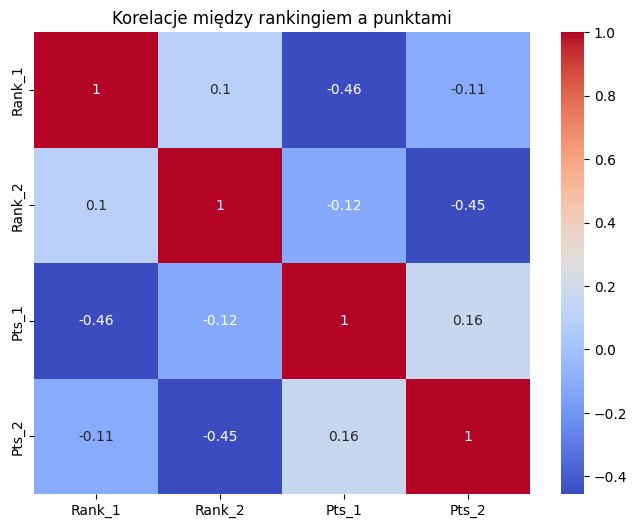

In [10]:
plt.figure(figsize=(8, 6))
numeric_cols = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelacje między rankingiem a punktami")
plt.show()


Wbrew pozorom korelacja między punktami a rankingiem zawodniczek nie jest bardzo wysoka. Obie zmienne mogą wnosić unikalną informację do modelu predykcyjnego, więc warto je zostawić.

### Wstępne hipotezy

- Czy ranking wpływa na zwycięstwo?

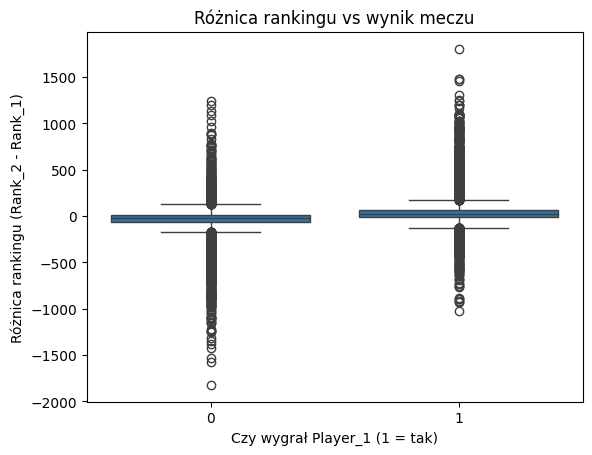

In [11]:
df['Player1_wins'] = (df['Winner'] == df['Player_1']).astype(int)
df['Rank_diff'] = df['Rank_2'] - df['Rank_1']  # pozytywna wartość: Player_1 ma lepszy ranking (ekstrakcja cechy)

sns.boxplot(x='Player1_wins', y='Rank_diff', data=df)
plt.title("Różnica rankingu vs wynik meczu")
plt.xlabel("Czy wygrał Player_1 (1 = tak)")
plt.ylabel("Różnica rankingu (Rank_2 - Rank_1)")
plt.show()


- Czy punkty wpływają na zwycięstwo?

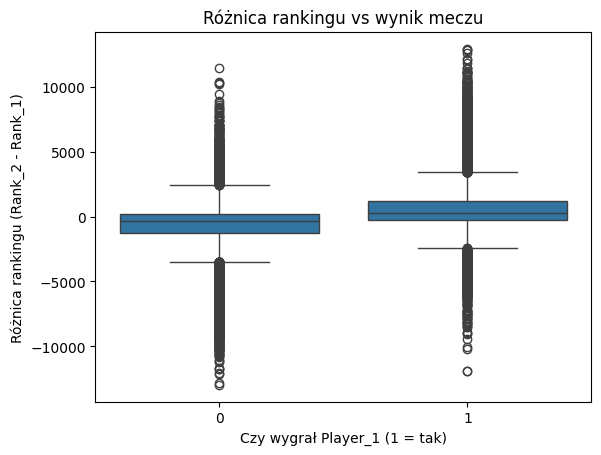

In [12]:
df['Points_diff'] = df['Pts_1'] - df['Pts_2']  # pozytywna wartość: Player_1 ma więcej punktów (ekstrakcja cechy)

sns.boxplot(x='Player1_wins', y='Points_diff', data=df)
plt.title("Różnica rankingu vs wynik meczu")
plt.xlabel("Czy wygrał Player_1 (1 = tak)")
plt.ylabel("Różnica rankingu (Rank_2 - Rank_1)")
plt.show()

# Przetwarzanie wstępne

- Normalizacja

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# przekonwertowanie Odd_1 z object na float by umozliwic normalizacje
df['Odd_1'] = pd.to_numeric(df['Odd_1'].str.replace(',', '.'), errors='coerce')

# normalizacja rankingow, punktow i kursow bukmacherskich
df[["Rank_1", "Rank_2", "Pts_1", "Pts_2", "Odd_1", "Odd_2", "Rank_diff", "Points_diff"]] = scaler.fit_transform(df[["Rank_1", "Rank_2", "Pts_1", "Pts_2", "Odd_1", "Odd_2", "Rank_diff", "Points_diff"]])
df.head()

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff
0,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Sun T.T.,Baker L.,Sun T.T.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845
1,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Myskina A.,Dulko G.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628
2,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Loit E.,Birnerova E.,Loit E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131
3,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Nakamura A.,Craybas J.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046
4,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Bartoli M.,Morita A.,Bartoli M.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349


- Odrzucenie outlierów

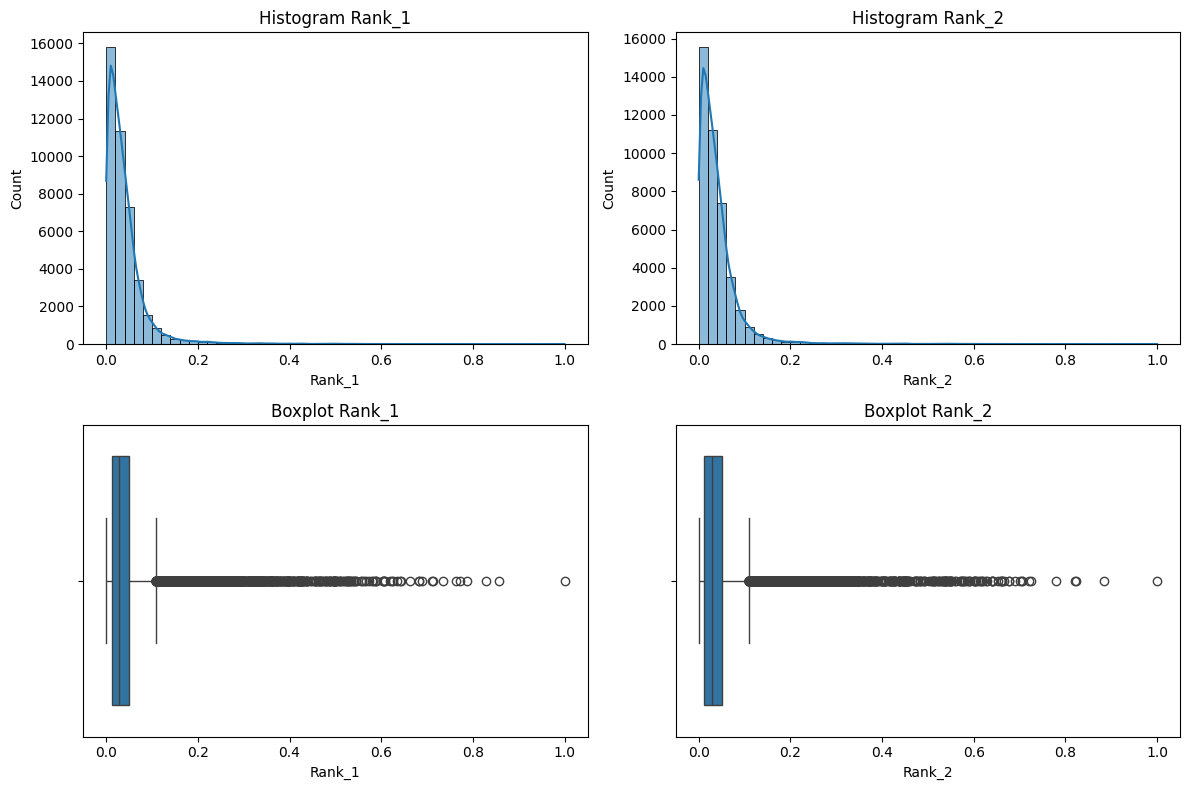

In [14]:
# Zmienna: rankingi
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['Rank_1'], bins=50, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Histogram Rank_1')

sns.histplot(df['Rank_2'], bins=50, ax=axs[0, 1], kde=True)
axs[0, 1].set_title('Histogram Rank_2')

sns.boxplot(x=df['Rank_1'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot Rank_1')

sns.boxplot(x=df['Rank_2'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot Rank_2')

plt.tight_layout()
plt.show()


Nie wiem czy usunięcie outlierów nie zaprowadzi do utraty cennych informacji o zawodnikach.

- Selekcja cech

In [15]:
df.head()

,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff
0,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Sun T.T.,Baker L.,Sun T.T.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845
1,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Myskina A.,Dulko G.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628
2,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Loit E.,Birnerova E.,Loit E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131
3,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Nakamura A.,Craybas J.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046
4,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Bartoli M.,Morita A.,Bartoli M.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349


Zostaną usunięte `Best of`, ponieważ kobiety grają tylko Bo3, `Winner`, które zastąpimy kolumną Player1_wins oraz `Tournament`, ponieważ nazwa turnieju nie będzie potrzebna w analizie.

In [16]:
df = df.drop(["Best of", "Winner", "Tournament"], axis=1)
df.head()

,Date,Court,Surface,Round,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff
0,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Sun T.T.,Baker L.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845
1,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Myskina A.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628
2,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Loit E.,Birnerova E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131
3,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Nakamura A.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046
4,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Bartoli M.,Morita A.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349


- Ekstrakcja cech

In [17]:
# podzielony score
df['Scores_split'] = df['Score'].apply(lambda x: x.split(' '))
df.head()

,Date,Court,Surface,Round,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff,Scores_split
0,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Sun T.T.,Baker L.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845,"[6-1, 6-1, ]"
1,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Myskina A.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628,"[1-6, 7-6, 2-6]"
2,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Loit E.,Birnerova E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131,"[6-1, 6-1, ]"
3,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Nakamura A.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046,"[5-7, 2-6, ]"
4,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Bartoli M.,Morita A.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349,"[7-6, 6-3, ]"


Wygrane sety i wygrane gemy

In [18]:
def count_sets_won(score):
    sets = score.split(' ')  # Podziel wynik na sety
    sets = [set_score for set_score in sets if set_score]  # Usuń puste elementy
    
    player_1_sets = 0
    player_2_sets = 0
    
    for set_score in sets:
        player_1, player_2 = map(int, set_score.split('-'))
        if player_1 > player_2:
            player_1_sets += 1
        else:
            player_2_sets += 1
            
    return player_1_sets, player_2_sets

def count_gems_won(score):
    sets = score.split(' ')  # Podziel wynik na sety
    sets = [set_score for set_score in sets if set_score]  # Usuń puste elementy

    player_1_gems = 0
    player_2_gems = 0

    for set_score in sets:
        player_1, player_2 = map(int, set_score.split('-'))
        player_1_gems += player_1
        player_2_gems += player_2

    return player_1_gems, player_2_gems


df[['Player_1_sets_won', 'Player_2_sets_won']] = df['Score'].apply(count_sets_won).apply(pd.Series)
df[['Player_1_gems_won', 'Player_2_gems_won']] = df['Score'].apply(count_gems_won).apply(pd.Series)

df = df.drop(["Scores_split"], axis=1)
df.head()


,Date,Court,Surface,Round,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,Player1_wins,Rank_diff,Points_diff,Player_1_sets_won,Player_2_sets_won,Player_1_gems_won,Player_2_gems_won
0,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Sun T.T.,Baker L.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,1,0.555280,0.509845,2,0,12,2
1,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Myskina A.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,0,0.514475,0.523628,1,2,10,18
2,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Loit E.,Birnerova E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,1,0.510339,0.504131,2,0,12,2
3,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Nakamura A.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,0,0.506203,0.502046,0,2,7,13
4,2007-01-01 00:00:00,Outdoor,Hard,1st Round,Bartoli M.,Morita A.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,1,0.547284,0.531349,2,0,13,9


In [19]:
df["Court"].unique()

array(['Outdoor', 'Indoor', 'Clay'], dtype=object)

In [20]:
df = pd.get_dummies(df, columns=['Court'], drop_first=True)

In [21]:
df["Surface"].unique()

array(['Hard', 'Carpet', 'Clay', 'Grass', 'Greenset'], dtype=object)

In [22]:
df = pd.get_dummies(df, columns=['Surface'], prefix='Surface')

In [23]:
df["Round"].unique()

array(['1st Round', '2nd Round', 'Quarterfinals', 'Semifinals',
       'The Final', '3rd Round', '4th Round', 'Round Robin',
       'Third Place'], dtype=object)

In [24]:
round_mapping = {
    '1st Round': 1,
    '2nd Round': 2,
    '3rd Round': 3,
    '4th Round': 4,
    'Round Robin': 5,
    'Quarterfinals': 6,
    'Semifinals': 7,
    'The Final': 10,
    'Third Place': 9
}

df['Round_encoded'] = df['Round'].map(round_mapping)

In [25]:
df = df.drop(["Round"], axis=1)
df.head()

,Date,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,...,Player_1_gems_won,Player_2_gems_won,Court_Indoor,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Greenset,Surface_Hard,Round_encoded
0,2007-01-01 00:00:00,Sun T.T.,Baker L.,0.042667,0.148575,0.024457,0.006683,0.066571,0.076923,6-1 6-1,...,12,2,False,True,False,False,False,False,True,1
1,2007-01-01 00:00:00,Myskina A.,Dulko G.,0.008000,0.031798,0.073516,0.029524,0.063429,0.091346,1-6 7-6 2-6,...,10,18,False,True,False,False,False,False,True,1
2,2007-01-01 00:00:00,Loit E.,Birnerova E.,0.029333,0.045504,0.030773,0.023869,0.077714,0.057692,6-1 6-1,...,12,2,False,True,False,False,False,False,True,1
3,2007-01-01 00:00:00,Nakamura A.,Craybas J.,0.029867,0.037829,0.029818,0.026880,0.080857,0.054423,5-7 2-6,...,7,13,False,True,False,False,False,False,True,1
4,2007-01-01 00:00:00,Bartoli M.,Morita A.,0.009067,0.098136,0.069918,0.011237,0.061714,0.105769,7-6 6-3,...,13,9,False,True,False,False,False,False,True,1


Head2Head i bilans 10 ostatnich meczów

In [ ]:
import pandas as pd

def add_h2h_and_last10_wl(
        df: pd.DataFrame,
        date_col: str = "Date",
        p1_col: str = "Player_1",
        p2_col: str = "Player_2",
        outcome_col: str = "Player1_wins",
) -> pd.DataFrame:
  
   
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    df = df.sort_values(date_col).reset_index(drop=True)

 
    h2h_wins: dict[tuple[str, str], int] = {}     
    recent: dict[str, list[int]] = {}             

    h2h_p1, h2h_p2 = [], []
    p1_wins10, p1_losses10 = [], []
    p2_wins10, p2_losses10 = [], []

    for _, row in df.iterrows():
        p1, p2 = row[p1_col], row[p2_col]

        h2h_p1.append(h2h_wins.get((p1, p2), 0))
        h2h_p2.append(h2h_wins.get((p2, p1), 0))

        last10_p1 = recent.get(p1, [])[-10:]
        last10_p2 = recent.get(p2, [])[-10:]

        p1_wins10.append(sum(last10_p1))
        p1_losses10.append(len(last10_p1) - sum(last10_p1))
        p2_wins10.append(sum(last10_p2))
        p2_losses10.append(len(last10_p2) - sum(last10_p2))

      
        p1_win = int(row[outcome_col]) 
        if p1_win:
            h2h_wins[(p1, p2)] = h2h_wins.get((p1, p2), 0) + 1
        else:
            h2h_wins[(p2, p1)] = h2h_wins.get((p2, p1), 0) + 1

     
        for player, won in [(p1, p1_win), (p2, 1 - p1_win)]:
            recent.setdefault(player, []).append(won)
            if len(recent[player]) > 10:
                recent[player] = recent[player][-10:]


    df["H2H_Player1_vs_Player2"] = h2h_p1
    df["H2H_Player2_vs_Player1"] = h2h_p2
    df["Player1_last10_wins"]    = p1_wins10
    df["Player1_last10_losses"]  = p1_losses10
    df["Player2_last10_wins"]    = p2_wins10
    df["Player2_last10_losses"]  = p2_losses10

    return df


In [27]:
df = add_h2h_and_last10_wl(df)


In [28]:
df.head()

,Date,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score,...,Surface_Grass,Surface_Greenset,Surface_Hard,Round_encoded,H2H_Player1_vs_Player2,H2H_Player2_vs_Player1,Player1_last10_wins,Player1_last10_losses,Player2_last10_wins,Player2_last10_losses
0,2006-12-31,Sequera M.,Ivanova E.,0.054400,0.099781,0.020637,0.010943,0.076000,0.059615,6-4 6-2,...,False,False,True,1,0,0,0,0,0,0
1,2006-12-31,Ferguson S.,Sugiyama A.,0.097600,0.013706,0.010796,0.052659,0.171429,0.041154,7-6 6-4,...,False,False,True,1,0,0,0,0,0,0
2,2006-12-31,Camerin M.E.,Vesnina E.,0.026133,0.025219,0.031360,0.032756,0.092857,0.049423,3-6 2-6,...,False,False,True,1,0,0,0,0,0,0
3,2006-12-31,Hingis M.,Bammer S.,0.003200,0.026316,0.148281,0.031654,0.059429,0.144231,6-0 6-2,...,False,False,True,1,0,0,0,0,0,0
4,2006-12-31,Benesova I.,Bremond S.,0.030400,0.021382,0.029598,0.038337,0.085714,0.052308,6-0 4-6 2-6,...,False,False,True,1,0,0,0,0,0,0


Dla `Court` oraz `Surface` dodano odpowiednie kolumny (aby uniknąć sztucznej kolejności), a dla `Round` zastosowano specjalną kolejność na podstawie wagi wydarzenia.

### Zapisanie przygotowanych danych

In [29]:
df.to_csv("../prepared_data/prepared_dataframe.csv")

Modele Klasyfikacji

Używamy 13,997 meczów od 2015-01-01

=== SVC – 5 sample predictions ===
Match ['Diyas Z.', 'Osaka N.'] → predicted: Osaka N.             | actual: Osaka N.              ✓
Match ['Vinci R.', 'Witthoeft C.'] → predicted: Vinci R.             | actual: Vinci R.              ✓
Match ['Van Uytvanck A.', 'Diyas Z.'] → predicted: Diyas Z.             | actual: Van Uytvanck A.       ✗
Match ['Townsend T.', 'Sharma A.'] → predicted: Townsend T.          | actual: Townsend T.           ✓
Match ['Rus A.', 'Williams S.'] → predicted: Williams S.          | actual: Williams S.           ✓
Accuracy : 0.6610714285714285
AUC-ROC : 0.742851530612245
Confusion Matrix:
 [[ 697  703]
 [ 246 1154]]
              precision    recall  f1-score   support

           0       0.74      0.50      0.59      1400
           1       0.62      0.82      0.71      1400

    accuracy                           0.66      2800
   macro avg       0.68      0.66      0.65      2800
weighted avg       0.68      0.66      0.

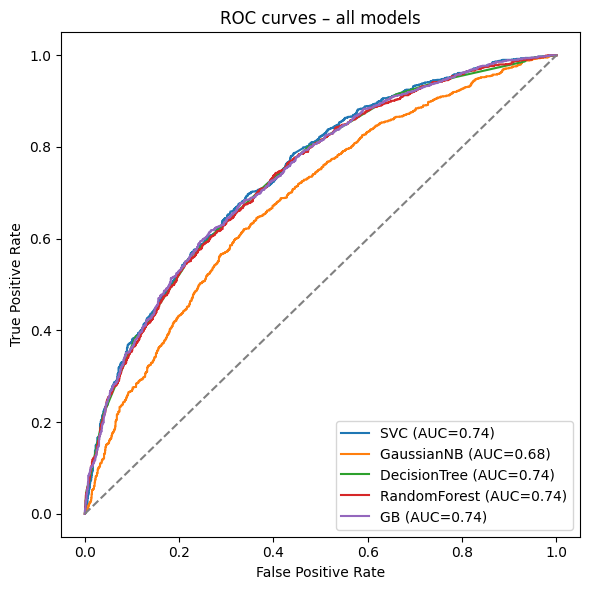

In [31]:
# tennis_models_full.py
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score,
                             roc_curve, classification_report)

# --------------------------------------------------
# 1. Wczytanie danych i podstawowe filtrowanie
# --------------------------------------------------
DATA_PATH = Path("../prepared_data/prepared_dataframe.csv")   
raw_df = pd.read_csv(DATA_PATH)
raw_df["Date"] = pd.to_datetime(raw_df["Date"], errors="coerce")
raw_df = (raw_df[raw_df["Date"] >= "2015-01-01"]
          .dropna()
          .sort_values("Date")
          .reset_index(drop=True))

# 1a. Cechy daty
raw_df["Date_year"]      = raw_df["Date"].dt.year
raw_df["Date_month"]     = raw_df["Date"].dt.month
raw_df["Date_dayofyear"] = raw_df["Date"].dt.dayofyear
raw_df["Date_dayofweek"] = raw_df["Date"].dt.dayofweek  # 0=Mon, 6=Sun
print(f"Używamy {len(raw_df):,} meczów od 2015-01-01")

# --------------------------------------------------
# 2. Przygotowanie cech i etykiety
# --------------------------------------------------
LEAK_COLS = [
    "Score", "Player_1_sets_won", "Player_2_sets_won",
    "Player_1_gems_won", "Player_2_gems_won"
]

def prepare_data(df: pd.DataFrame):
    X = df.drop(columns=["Player1_wins", "Date", "Player_1", "Player_2", *LEAK_COLS],
                errors="ignore")
    y = df["Player1_wins"]
    players = df[["Player_1", "Player_2"]]
    return X, y, players

X, y, players = prepare_data(raw_df)
feature_cols = list(X.columns)
joblib.dump(feature_cols, "model_features.pkl")

# --------------------------------------------------
# 3. Podział train / test (losowy 80/20)
# --------------------------------------------------
X_train, X_test, y_train, y_test, p_train, p_test = train_test_split(
    X, y, players, test_size=0.2, random_state=42, stratify=y
)
X_test  = X_test.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)
p_test  = p_test.reset_index(drop=True)

# --------------------------------------------------
# 4. Standaryzacja 
# --------------------------------------------------
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std  = scaler.transform(X_test)

# --------------------------------------------------
# 5. Trening modeli
# --------------------------------------------------
models = {
    # --- Support Vector Machine -------------------------------------------
    "SVC": GridSearchCV(
        SVC(probability=True, random_state=42),
        param_grid={"C": [0.1, 1, 10], "kernel": ["rbf", "linear"]},
        cv=5, scoring="roc_auc", n_jobs=-1
    ).fit(X_train_std, y_train).best_estimator_,

    # --- Naive Bayes -------------------------------------------------------
    "GaussianNB": GaussianNB().fit(X_train, y_train),

    # --- Decision Tree ----------------------------------------------------
    "DecisionTree": GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid={"max_depth": [None, 5, 10, 20], "min_samples_leaf": [1, 5, 10]},
        cv=5, scoring="roc_auc", n_jobs=-1
    ).fit(X_train, y_train).best_estimator_,

    # --- Random Forest ----------------------------------------------------
    "RandomForest": GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid={"n_estimators": [200], "max_depth": [None, 10, 20]},
        cv=5, scoring="roc_auc", n_jobs=-1
    ).fit(X_train, y_train).best_estimator_,

   

    # --- Gradient Boosting -----------------------------------------------
    "GB": GridSearchCV(
        GradientBoostingClassifier(random_state=42),
        param_grid={
            "n_estimators": [200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5]
        },
        cv=5, scoring="roc_auc", n_jobs=-1
    ).fit(X_train, y_train).best_estimator_
}

# --------------------------------------------------
# 6. Zapis modeli i skalera
# --------------------------------------------------
joblib.dump(scaler, "svc_scaler.pkl")
for name, mdl in models.items():
    joblib.dump(mdl, f"{name.lower()}_model.pkl")

# --------------------------------------------------
# 7. Funkcje pomocnicze
# --------------------------------------------------
def _align(df_row: pd.DataFrame, cols: list):
    """Ujednolica kolumny w wierszu cech (braki -> 0)."""
    return df_row.reindex(columns=cols, fill_value=0)

def predict_winner_row(model, scaled, cols, row_feats: dict, p1: str, p2: str):
    """Zwraca zwycięzcę typowany przez model dla pojedynczego meczu."""
    X_row = _align(pd.DataFrame([row_feats]), cols)
    if scaled:
        X_row = scaler.transform(X_row)
    pred = model.predict(X_row)[0]
    return p1 if pred == 1 else p2

# --------------------------------------------------
# 8. Ewaluacja + przykładowe predykcje + wykresy ROC
# --------------------------------------------------
plt.figure(figsize=(6, 6))
for name, model in models.items():
    scaled = name in {"SVC", "LogReg"}
    X_eval = X_test_std if scaled else X_test

    y_pred  = model.predict(X_eval)
    y_proba = model.predict_proba(X_eval)[:, 1]

    # --- 5 przykładowych meczów -----------------------------------------
    print(f"\n=== {name} – 5 sample predictions ===")
    for i in range(5):
        true_winner = (p_test.iloc[i]["Player_1"]
                       if y_test.iloc[i] == 1
                       else p_test.iloc[i]["Player_2"])
        pred_winner = predict_winner_row(
            model, scaled, feature_cols,
            X_test.iloc[i].to_dict(),
            p_test.iloc[i]["Player_1"],
            p_test.iloc[i]["Player_2"]
        )
        match = p_test.iloc[i][["Player_1", "Player_2"]].tolist()
        correct = "✓" if pred_winner == true_winner else "✗"
        print(f"Match {match} → predicted: {pred_winner:20s} | actual: {true_winner:20s}  {correct}")

    # --- Metryki ---------------------------------------------------------
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("AUC-ROC :", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # --- ROC curve -------------------------------------------------------
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.2f})")


plt.plot([0, 1], [0, 1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves – all models")
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
# === 8. Ewaluacja i przykładowe predykcje ===
for name, model in models.items():
    X_eval = X_test_std if name == 'SVC' else X_test
    y_pred  = model.predict(X_eval)
    y_proba = model.predict_proba(X_eval)[:, 1]

    print(f"\n=== {name} – 5 sample predictions (z cechami daty) ===")
    for i in range(5):
        # ------------------------- NEW -------------------------
        true_winner = (p_test.iloc[i]['Player_1']
                       if y_test.iloc[i] == 1
                       else p_test.iloc[i]['Player_2'])
        pred_winner = predict_winner_row(
            model,
            scaler if name == 'SVC' else None,
            feature_cols,
            X_test.iloc[i].to_dict(),
            p_test.iloc[i]['Player_1'],
            p_test.iloc[i]['Player_2']
        )
        match = p_test.iloc[i][['Player_1', 'Player_2']].tolist()
        correct = "✓" if pred_winner == true_winner else "✗"
        print(f"Match {match} → predicted: {pred_winner:20s} | actual: {true_winner:20s}  {correct}")
        # -------------------------------------------------------

    print("Accuracy:", accuracy_score(y_test, y_pred))
    ...



=== SVC – 5 sample predictions (z cechami daty) ===
Match ['Diyas Z.', 'Osaka N.'] → predicted: Osaka N.             | actual: Osaka N.              ✓
Match ['Vinci R.', 'Witthoeft C.'] → predicted: Vinci R.             | actual: Vinci R.              ✓
Match ['Van Uytvanck A.', 'Diyas Z.'] → predicted: Diyas Z.             | actual: Van Uytvanck A.       ✗
Match ['Townsend T.', 'Sharma A.'] → predicted: Townsend T.          | actual: Townsend T.           ✓
Match ['Rus A.', 'Williams S.'] → predicted: Williams S.          | actual: Williams S.           ✓
Accuracy: 0.6610714285714285

=== GaussianNB – 5 sample predictions (z cechami daty) ===
Match ['Diyas Z.', 'Osaka N.'] → predicted: Osaka N.             | actual: Osaka N.              ✓
Match ['Vinci R.', 'Witthoeft C.'] → predicted: Vinci R.             | actual: Vinci R.              ✓
Match ['Van Uytvanck A.', 'Diyas Z.'] → predicted: Van Uytvanck A.      | actual: Van Uytvanck A.       ✓
Match ['Townsend T.', 'Sharma A.'] → pr

In [33]:
print(X.columns)

Index(['Unnamed: 0', 'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2',
       'Rank_diff', 'Points_diff', 'Court_Indoor', 'Court_Outdoor',
       'Surface_Carpet', 'Surface_Clay', 'Surface_Grass', 'Surface_Greenset',
       'Surface_Hard', 'Round_encoded', 'H2H_Player1_vs_Player2',
       'H2H_Player2_vs_Player1', 'Player1_last10_wins',
       'Player1_last10_losses', 'Player2_last10_wins', 'Player2_last10_losses',
       'Date_year', 'Date_month', 'Date_dayofyear', 'Date_dayofweek'],
      dtype='object')
